In [8]:
import os
import stata_setup

## 设置pystata目录
stata_setup.config(os.getenv("STATA_SYSDIR"), 'mp')

In [9]:
%stata use "cfps2010.dta", clear

In [10]:
%stata reg lninc college, vce(cluster provcd)


Linear regression                               Number of obs     =      4,137
                                                F(1, 24)          =     271.17
                                                Prob > F          =     0.0000
                                                R-squared         =     0.1095
                                                Root MSE          =     1.1498

                                (Std. err. adjusted for 25 clusters in provcd)
------------------------------------------------------------------------------
             |               Robust
       lninc | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     college |    .823612   .0500155    16.47   0.000     .7203851     .926839
       _cons |   9.353189   .1084703    86.23   0.000     9.129317    9.577061
------------------------------------------------------------------------------


In [ ]:
## pscore 命令无法使用"i."自动生成虚拟变量。因此，必须先用tabulate命令生成 fmedu 的虚拟变量，然后再使用pscore命令
%stata tabulate fmedu, gen(fmedu)

In [17]:
%stata sum fmedu*


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
       fmedu |      4,137    .6579647     .816154          0          2
      fmedu1 |      4,137    .5624849    .4961402          0          1
      fmedu2 |      4,137    .2170655    .4122974          0          1
      fmedu3 |      4,137    .2204496       .4146          0          1


In [25]:
%stata pscore college hukou age gender race sibling fmedu2 fmedu3, pscore(ps) blockid(strata) logit comsup




**************************************************** 
Algorithm to estimate the propensity score 
**************************************************** 


The treatment is college

     是否上 |
       大学 |      Freq.     Percent        Cum.
------------+-----------------------------------
         否 |      2,494       60.29       60.29
         是 |      1,643       39.71      100.00
------------+-----------------------------------
      Total |      4,137      100.00



Estimation of the propensity score 

Iteration 0:   log likelihood = -2779.3946
Iteration 1:   log likelihood = -2437.5718
Iteration 2:   log likelihood = -2433.2339
Iteration 3:   log likelihood = -2433.2257
Iteration 4:   log likelihood = -2433.2257

Logistic regression                               Number of obs   =       4137
                                                  LR chi2(7)      =     692.34
                                                  Prob > chi2     =     0.0000
Log likelihood = -2433.2257        

In [26]:
%stata drop ps strata comsup

In [27]:
%%stata
## 没有通过平衡性检验，stata 建议重新设定倾向值的估计方程
gen hukouage=hukou*age
pscore college hukou hukouage age age2 gender race sibling fmedu2 fmedu3, pscore(ps) blockid(strata) logit comsup


. ## 没有通过平衡性检验
Unknown #command
. gen hukouage=hukou*age

. pscore college hukou hukouage age age2 gender race sibling fmedu2 fmedu3, psc
> ore(ps) blockid(strata) logit comsup



**************************************************** 
Algorithm to estimate the propensity score 
**************************************************** 


The treatment is college

     是否上 |
       大学 |      Freq.     Percent        Cum.
------------+-----------------------------------
         否 |      2,494       60.29       60.29
         是 |      1,643       39.71      100.00
------------+-----------------------------------
      Total |      4,137      100.00



Estimation of the propensity score 

Iteration 0:   log likelihood = -2779.3946
Iteration 1:   log likelihood = -2429.5513
Iteration 2:   log likelihood =  -2422.173
Iteration 3:   log likelihood = -2422.1088
Iteration 4:   log likelihood = -2422.1087

Logistic regression                               Number of obs   =       4137
               

In [28]:
%stata atts lninc college, pscore(ps) blockid(strata) comsup




ATT estimation with the Stratification method
Analytical standard errors

---------------------------------------------------------
n. treat.   n. contr.         ATT   Std. Err.           t
---------------------------------------------------------

     1643        2494       0.691       0.043      15.984

---------------------------------------------------------



                                                       Number of obs =    4137
------------------------------------------------------------------------------
       lninc |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
TE by strata |                                                                
           1 |   1.127695   .1261502     8.94   0.000     .8804449    1.374945
           2 |   1.022366   .1455883     7.02   0.000      .737018    1.307714
           3 |   1.060989   .1569723     6.76   0.000     .7533288    1.368649
           4 |   .7679974   .0852362     9.01   0.000     .6009374    .9350574
           5 |   .5875918   .0806062     7.29   0.000     .4296066     .745577
           6 |   .5250521    .112322     4.67   0.000      .304905    .7451992
           7 |   .6410306   .0995247     6.44   0.000     .4459658    .8360953
           8 |   .6611019   .1463207     4.52   0.0

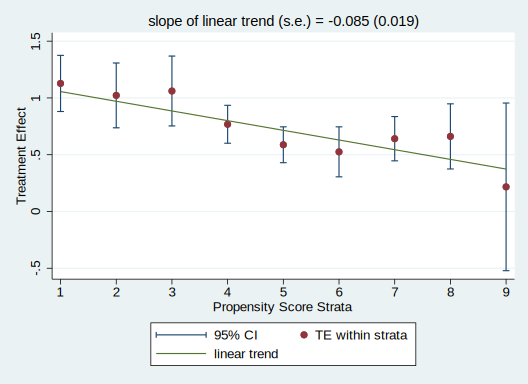

In [29]:
## 使用SM方法分析干预效应的异质性
%stata hte sm lninc college hukou hukouage age age2 gender race sibling fmedu2 fmedu3, logit comsup

(running psmatch2 ...)

Logistic regression                                     Number of obs =  4,137
                                                        LR chi2(9)    = 714.57
                                                        Prob > chi2   = 0.0000
Log likelihood = -2422.1087                             Pseudo R2     = 0.1285

------------------------------------------------------------------------------
     college | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       hukou |   .7612414   .3489558     2.18   0.029     .0773006    1.445182
    hukouage |   -.010548   .0087546    -1.20   0.228    -.0277067    .0066107
         age |   .1150714   .0429697     2.68   0.007     .0308523    .1992905
        age2 |  -.0024131    .000549    -4.40   0.000    -.0034892    -.001337
      gender |  -.0093303   .0708578    -0.13   0.895     -.148209    .1295484
        race |  -.1836443  

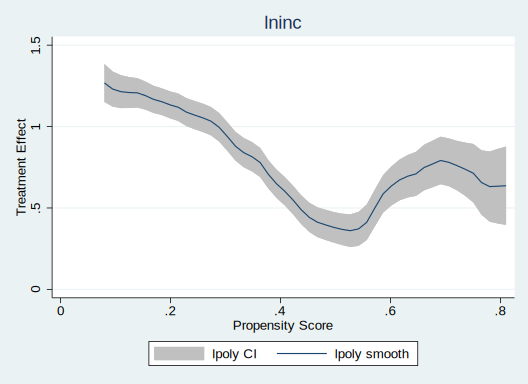

In [30]:
## 使用MS方法分析干预效应的异质性
%stata hte ms lninc college hukou hukouage age age2 gender race sibling fmedu2 fmedu3, logit common noscatter lpolyci

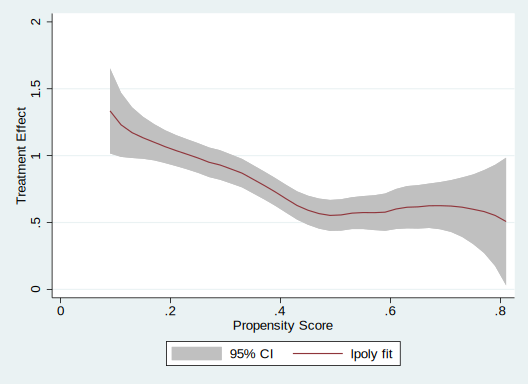

In [31]:
## 使用SD方法分析干预效应的异质性
%stata hte sd lninc college hukou hukouage age age2 gender race sibling fmedu2 fmedu3, logit comsup

In [36]:
%%stata

// 倾向值加权（手动实现）
// 计算倾斜值
qui logit college hukou hukou##c.age c.age##c.age gender race sibling fmedu2 fmedu3
predict p


. 
. // 倾向值加权（手动实现）
. qui logit college hukou hukou##c.age c.age##c.age gender race sibling fmedu2 
> fmedu3

. predict p
(option pr assumed; Pr(college))

. 


In [37]:
%%stata

// 计算权重
gen w_ate=1/p if college==1
replace w_ate=1/(1-p) if college==0

gen w_att=1 if college==1
replace w_att=p/(1-p) if college==0

gen w_atu=(1-p)/p if college==1
replace w_atu=1 if college==0


. 
. // 计算权重
. gen w_ate=1/p if college==1
(2,494 missing values generated)

. replace w_ate=1/(1-p) if college==0
(2,494 real changes made)

. 
. gen w_att=1 if college==1
(2,494 missing values generated)

. replace w_att=p/(1-p) if college==0
(2,494 real changes made)

. 
. gen w_atu=(1-p)/p if college==1
(2,494 missing values generated)

. replace w_atu=1 if college==0
(2,494 real changes made)

. 


In [38]:
%%stata

// 进行加权线性回归
reg lninc college [pw=w_ate], vce(cluster provcd)
reg lninc college [pw=w_att], vce(cluster provcd)
reg lninc college [pw=w_atu], vce(cluster provcd)


. 
. // 进行加权线性回归
. reg lninc college [pw=w_ate], vce(cluster provcd)
(sum of wgt is 8,296.73905217648)

Linear regression                               Number of obs     =      4,137
                                                F(1, 24)          =     238.29
                                                Prob > F          =     0.0000
                                                R-squared         =     0.1157
                                                Root MSE          =     1.1086

                                (Std. err. adjusted for 25 clusters in provcd)
------------------------------------------------------------------------------
             |               Robust
       lninc | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     college |    .801988   .0519531    15.44   0.000      .694762    .9092139
       _cons |   9.405058   .1124885    83.61   0.000     9.172893  

In [39]:
%%stata

// 倾向值加权
teffects ipw (lninc) (college hukou hukou##c.age c.age##c.age gender race sibling fmedu2 fmedu3)
teffects ipw (lninc) (college hukou hukou##c.age c.age##c.age gender race sibling fmedu2 fmedu3), atet


. 
. // 倾向值加权
. teffects ipw (lninc) (college hukou hukou##c.age c.age##c.age gender race sib
> ling fmedu2 fmedu3)
note: 1.hukou omitted because of collinearity.
note: age omitted because of collinearity.

Iteration 0:   EE criterion =  3.679e-21  
Iteration 1:   EE criterion =  5.065e-31  

Treatment-effects estimation                    Number of obs     =      4,137
Estimator      : inverse-probability weights
Outcome model  : weighted mean
Treatment model: logit
------------------------------------------------------------------------------
             |               Robust
       lninc | Coefficient  std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
ATE          |
     college |
 (是 vs 否)  |    .801988   .0379528    21.13   0.000     .7276019    .8763741
-------------+----------------------------------------------------------------
POmean       |
     college |
         否  |   9.405058   .0271151   

In [40]:
## 平衡性检验（回归分析说明年龄不会受到分组的影响）
%stata reg age college [pw=w_ate], vce(cluster provcd)

(sum of wgt is 8,296.73905217648)

Linear regression                               Number of obs     =      4,137
                                                F(1, 24)          =       0.08
                                                Prob > F          =     0.7796
                                                R-squared         =     0.0001
                                                Root MSE          =     9.1311

                                (Std. err. adjusted for 25 clusters in provcd)
------------------------------------------------------------------------------
             |               Robust
         age | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     college |   .1454856   .5140792     0.28   0.780    -.9155217    1.206493
       _cons |   39.65485   .4101642    96.68   0.000     38.80831    40.50138
-----------------------------------------------------------

In [41]:
%stata qui teffects ipw (lninc) (college hukou hukou##c.age c.age##c.age gender race sibling fmedu2 fmedu3)

In [42]:
%stata tebalance summarize


Covariate balance summary

                         Raw     Weighted
-----------------------------------------
Number of obs =        4,137      4,137.0
Treated obs   =        1,643      2,074.4
Control obs   =        2,494      2,062.6
-----------------------------------------

-----------------------------------------------------------------
                |Standardized differences          Variance ratio
                |        Raw    Weighted           Raw   Weighted
----------------+------------------------------------------------
          hukou |   .2397965      .01079      1.082133   1.004144
            age |  -.7815923    .0159334       .816613   1.034943
                |
          hukou#|
            age |
      城镇户口  |   .0759021    .0149513      .7676175   1.022716
                |
            age#|
            age |  -.7903714    .0196792      .7091451   1.050748
                |
         gender |  -.0820793    .0237794      1.025374   .9914028
           race |  -.

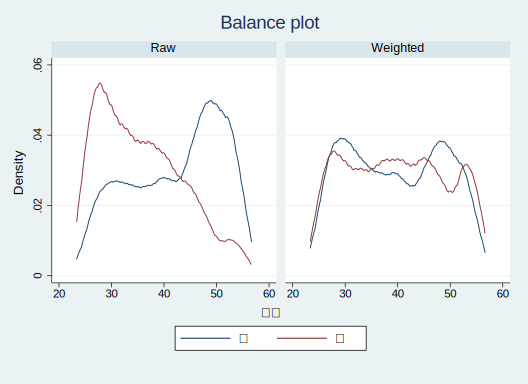

In [43]:
%stata tebalance density age

In [44]:
%stata tebalance overid, nolog


Overidentification test for covariate balance
H0: Covariates are balanced

         chi2(10)     =  24.7885
         Prob > chi2  =   0.0058


In [45]:
## 去除 age 的平方项 和 age与hukou 的交互项，只对协变量的初始测量进行平衡性检验
%stata tebalance overid, bconly nolog


Overidentification test for covariate balance
H0: Covariates are balanced

         chi2(8)      =  15.0045
         Prob > chi2  =   0.0591


In [46]:
## 双重稳健估计(ipwra)
%stata teffects ipwra (lninc hukou age gender race sibling fmedu2 fmedu3) (college hukou hukou##c.age c.age##c.age gender race sibling fmedu2 fmedu3)

note: 1.hukou omitted because of collinearity.
note: age omitted because of collinearity.

Iteration 0:   EE criterion =  3.679e-21  
Iteration 1:   EE criterion =  9.166e-31  

Treatment-effects estimation                    Number of obs     =      4,137
Estimator      : IPW regression adjustment
Outcome model  : linear
Treatment model: logit
------------------------------------------------------------------------------
             |               Robust
       lninc | Coefficient  std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
ATE          |
     college |
 (是 vs 否)  |   .7980164   .0377585    21.13   0.000      .724011    .8720217
-------------+----------------------------------------------------------------
POmean       |
     college |
         否  |   9.404692   .0271286   346.67   0.000     9.351521    9.457863
------------------------------------------------------------------------------


In [47]:
%stata teffects aipw (lninc hukou age gender race sibling fmedu2 fmedu3) (college hukou hukou##c.age c.age##c.age gender race sibling fmedu2 fmedu3)

note: 1.hukou omitted because of collinearity.
note: age omitted because of collinearity.

Iteration 0:   EE criterion =  3.679e-21  
Iteration 1:   EE criterion =  4.519e-31  

Treatment-effects estimation                    Number of obs     =      4,137
Estimator      : augmented IPW
Outcome model  : linear by ML
Treatment model: logit
------------------------------------------------------------------------------
             |               Robust
       lninc | Coefficient  std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
ATE          |
     college |
 (是 vs 否)  |   .7972419   .0378972    21.04   0.000     .7229646    .8715191
-------------+----------------------------------------------------------------
POmean       |
     college |
         否  |   9.405056    .027155   346.35   0.000     9.351833    9.458279
------------------------------------------------------------------------------
